## equilibrar todos os niveis de fadiga e de sexos, usando smote

eq fadiga com smote

### o smote não é bom pq cria variaveis continuas mesmo quando sao ordinais

### Import of libraries

In [1]:
import pandas as pd
import numpy as np

### Reading of the file and one of the sheets

In [2]:
# The athletes' names are hiden, and only the initial name and gender are visible through the naming of each dataset

Athletes = {'F_f': '',
            'J_f': '',
            'F_m': '',
            'G_m': '',
            'V_f': '',
            'A_m': '',
            'I_f': ''
            }

# Importing the data to the Athletes dictionary
for i in Athletes:
    Athletes[i] = pd.read_excel('DataFatigInd.xlsx', sheet_name = i)
    Athletes[i]['U.A. Intensidade (ontem)'] =  Athletes[i]['U.A. Intensidade'].shift(1)
    Athletes[i]['Diferença Peso'] = Athletes[i]['Peso basal'].pct_change()
    Athletes[i]['Diferença Pulso'] = Athletes[i]['Pulso após 2 horas'] - Athletes[i]['Pulso basal']
    Athletes[i].rename(columns={'Data': 'Date',
                                'Nr dia': 'NrDay',
                                'Qualidade de Sono': 'QSleep',
                                'Horas de Cama': 'TSleep',
                                'Apetite': 'Appetite',
                                'Estado de Ânimo': 'StSpirit',
                                'Percepção Carga': 'pEffort',
                                'Pulso após 2 horas': 'ATHr',
                                'Pulso basal': 'Hr',
                                'U.A. Intensidade': 'uaI',
                                'ÍNDICE DE FADIGA': 'FatigInd',
                                'Peso basal': 'Wt',
                                'U.A. Intensidade (ontem)': 'uaI(-1)',
                                'Diferença Peso': 'DeltaWt (%)',
                                'Diferença Pulso': 'DeltaHrtwo'
                                }, inplace=True)
    Athletes[i]["Name"] = i
    Athletes[i]["Sex_F"] = 1 if i[-1] == "f" else 0
    Athletes[i]["SleepInd"] =  Athletes[i]["QSleep"] - Athletes[i]["TSleep"]
    
df = pd.concat(Athletes.values(), ignore_index=True)
df.drop(columns=['NrDay', 'QSleep', 'TSleep', 'Hr', 'ATHr', 'Wt'], inplace=True)

df

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_6519/1740791164.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  Athletes[i]['Diferença Peso'] = Athletes[i]['Peso basal'].pct_change()


,Date,Appetite,StSpirit,pEffort,uaI,FatigInd,uaI(-1),DeltaWt (%),DeltaHrtwo,Name,Sex_F,SleepInd
0,2019-10-18,6.0,4.0,6.0,1.76,99.809325,NaN,NaN,2.0,F_f,1,-3.50
1,2019-10-19,7.0,7.0,7.0,1.66,87.095325,1.76,0.000000,-6.0,F_f,1,-7.00
2,2019-10-20,7.0,3.0,4.0,1.42,50.660225,1.66,0.000000,6.0,F_f,1,-8.75
3,2019-10-21,5.0,3.0,4.0,2.03,64.996625,1.42,0.000000,0.0,F_f,1,-5.50
4,2019-10-22,6.0,3.0,6.0,1.62,57.985725,2.03,0.009917,-6.0,F_f,1,-5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2020-05-12,6.0,5.0,6.0,2.00,115.433793,2.00,0.000000,12.0,I_f,1,-5.00
1268,2020-05-13,6.0,5.0,5.0,2.00,53.098793,2.00,0.000000,6.0,I_f,1,-6.50
1269,2020-05-14,6.0,5.0,5.0,2.00,53.423793,2.00,0.000000,6.0,I_f,1,-6.00
1270,2020-05-15,6.0,5.0,6.0,2.00,80.333793,2.00,0.000000,6.0,I_f,1,-5.00


O mais interessante é saber a classificação da fadiga para determinar o peso do treino e não o valor, logo devemos fazer intervalos. Seguindo as indicaçãos do expert aka treinador:

5 fatigue classifications:

- *Risk*: Danger! Must rest. Risk of injury or pathological fatigue.

- *Caution*: Caution! If it repeats over several days, reduce the load.

- *Optimal*: Optimal workload.

- *Low*: Low load zone. For recovery purposes only.

- *Minimal*: Excessively low load. Ineffective work.

In [3]:
def fatigue_class(fatigue):
    if fatigue > 80:
        return "Risk/Caution"
    elif fatigue >= 40:
        return "Optimal"
    else:
        return "Low/Minimal"
    
df["FatigInd"] = df["FatigInd"].map(fatigue_class)

In [4]:
# Brief description of the data
df = df[['Name', 'Date', 'Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
         'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd']]

df.info()#.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1272 non-null   object        
 1   Date         1272 non-null   datetime64[ns]
 2   Sex_F        1272 non-null   int64         
 3   Appetite     1183 non-null   float64       
 4   SleepInd     1185 non-null   float64       
 5   StSpirit     1183 non-null   float64       
 6   pEffort      1183 non-null   float64       
 7   uaI          1255 non-null   float64       
 8   uaI(-1)      1248 non-null   float64       
 9   DeltaWt (%)  1265 non-null   float64       
 10  DeltaHrtwo   1171 non-null   float64       
 11  FatigInd     1272 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 119.4+ KB


### Description of the variables


- *deltahrtwo - se modelo for mau, fazer apos2h - media do basal - 10

- *DeltaHrb

|  | Variables             | Simplified variable | Description                                                   | Scale     |
|--| --------------------- | ------------------- | ------------------------------------------------------------- | --------- |
|  |                       | All scales go from lowest (best feeling) to highest (worse feeling)                 |           |
| 0|                       | Name                | First letter of the athlete's name and sex                    |           |
| 1| Data                  | Date                | Date of the measure                                           | Ordinal   |
| 2|                       | Sex_F               | Athlete's gender                                              |           |
| 3| Apetite               | Appetite            | Measure of appetite throughout the day                        | 2 - 10    |
| 4| Índice de Sono        | SleepInd            | Calculated as function of quality of sleep and time in bed    | Ordinal   |
| 5| Estado de ânimo       | StSpirit            | State of spirit, motivation                                   | 2 - 10    |
| 6| Percepção de carga    | pEffort             | Perceived effort from the workout                             | 2 - 10    |
| 7| U. A. Intensidade     | uaI                 | Calculated int. from each workout, depending on type of exe.  | 1 - 5     |
| 8| U. A. Intensidade (ontem) | uaI(-1)         | uaI from the day before                                       | 1 - 5     |
| 9| Diferença peso        | DeltaWt (%)         | Percentual difference in weight in consecutive days           | 0 - 100   |
|10| Diferença pulso 2 hr  | DeltaHrtwo          | Delta of heart rate before and after the workout              | 2 - 10    |
|11| Índica de Fadiga      | FatigInd            | Calculated fatigue index from the variables above             | 0 - 100   |


In [5]:
df.isna().sum()

Name             0
Date             0
Sex_F            0
Appetite        89
SleepInd        87
StSpirit        89
pEffort         89
uaI             17
uaI(-1)         24
DeltaWt (%)      7
DeltaHrtwo     101
FatigInd         0
dtype: int64

## NaN

apos analisar as variaveis e os valores em falta, chegou-se a conclusao que o melhor seria remover obs com valores em falta

In [6]:
df.dropna(inplace=True)
df.isna().sum()

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_6519/3486782518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Name           0
Date           0
Sex_F          0
Appetite       0
SleepInd       0
StSpirit       0
pEffort        0
uaI            0
uaI(-1)        0
DeltaWt (%)    0
DeltaHrtwo     0
FatigInd       0
dtype: int64

## dataset analysis pt.2 

ver qnt de tipos de fadiga e sexos

In [7]:
combinacoes = df.groupby(['FatigInd']).size().reset_index(name='contagem')
print(combinacoes)

       FatigInd  contagem
0   Low/Minimal       194
1       Optimal       742
2  Risk/Caution       225


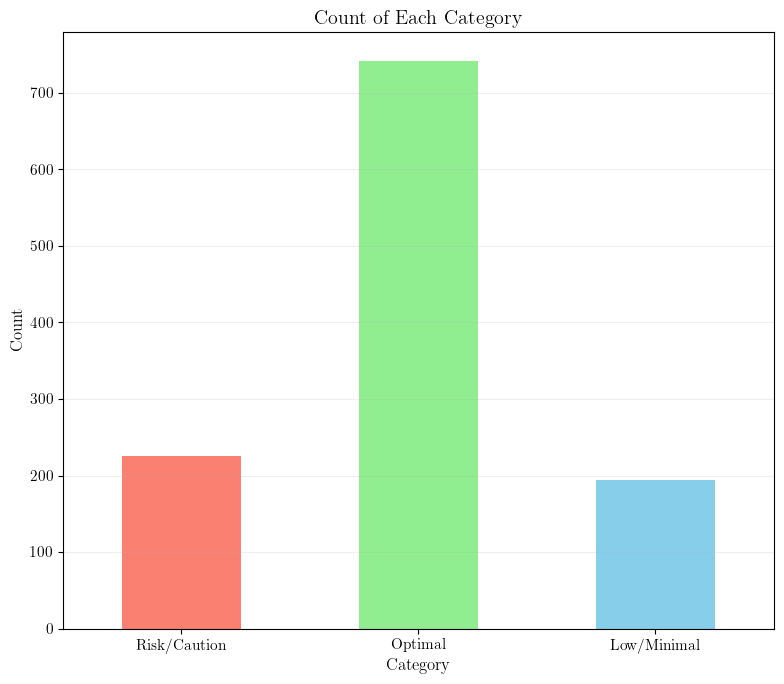

In [8]:
def plot_FATIGvsSEX(df):
    import matplotlib.pyplot as plt

    color_map = {
        'Risk/Caution': 'salmon',
        'Low/Minimal': 'skyblue',
        'Optimal': 'lightgreen'
        # Add more categories and their corresponding colors if needed
    }

    plt.rcParams.update({
        "text.usetex": True,              # If you want to use LaTeX fonts in text
        "font.family": "serif",           # IEEE uses Times New Roman-like fonts
        "font.size": 12,                   # General font size for IEEE format
        "axes.labelsize": 12,              # Axis labels font size
        "legend.fontsize": 11,             # Legend font size
        "xtick.labelsize": 11,             # X-axis tick labels font size
        "ytick.labelsize": 11,             # Y-axis tick labels font size
        "figure.figsize": (5, 5*0.8),
        "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
    })

    # Count occurrences of each category in FatigInd
    contagem = df['FatigInd'].value_counts()
    custom_order = ['Risk/Caution', 'Optimal', 'Low/Minimal']
    contagem = contagem[custom_order]
    
    colors = [color_map.get(cat, 'gray') for cat in contagem.index]

    

    # Plot the chart
    contagem.plot(kind='bar', color=colors, figsize=(8, 7))
    plt.title('Count of Each Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.2)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'assets/distribution_FatigInd(0).png', dpi=900, bbox_inches='tight', transparent=True)
    plt.show()


plot_FATIGvsSEX(df)

In [9]:
225

225

# UNICA PARTE DIFERENTE: SMOTE E UNDERSAMPLER

In [10]:
# EQUALIZING THE CLASSES
classes = df["FatigInd"].unique()
target_count = 225

df_balanced = pd.DataFrame() 
for cls in classes:
    class_rows = df[df["FatigInd"] == cls]
    current_count = len(class_rows)
    
    if current_count < target_count:
        # If the class has fewer rows than target, add rows
        extra_needed = target_count - current_count
        sampled_rows = class_rows.sample(n=extra_needed, replace=True, random_state=42)
        df_balanced = pd.concat([df_balanced, class_rows, sampled_rows], ignore_index=True)

    elif current_count > target_count:
        # If the class has more rows than target, randomly remove rows
        sampled_rows = class_rows.sample(n=target_count, random_state=42)
        df_balanced = pd.concat([df_balanced, sampled_rows], ignore_index=True)

    else:
        # If the class is already at the target count, keep as is
        df_balanced = pd.concat([df_balanced, class_rows], ignore_index=True)
    

combinacoes = df_balanced.groupby(['FatigInd']).size().reset_index(name='contagem')
print(combinacoes)

       FatigInd  contagem
0   Low/Minimal       225
1       Optimal       225
2  Risk/Caution       225


In [ ]:
df_balanced.to_csv('08notsmote.csv', index=False)